In [1]:
from validator.InstanceCO22 import InstanceCO22
import warnings
from collections import OrderedDict
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
from util import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from vrpy import VehicleRoutingProblem
import pprint
sns.set()
%load_ext autoreload
%autoreload 1

In [46]:
instance = loadInstance(26)

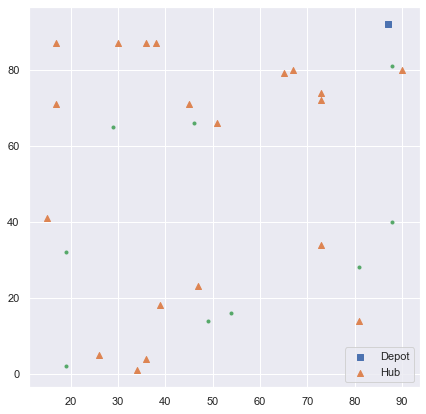

In [47]:
plotInstance(instance)

In [48]:
def locIDtoHubID(loc_ID):
    return loc_ID - 1

def hubIDtoLocID(hub_ID):
    return hub_ID + 1

In [49]:
def distance(loc1: InstanceCO22.Location, loc2: InstanceCO22.Location, ceil: bool = True) -> float:
    dist =  math.sqrt((loc1.X - loc2.X)**2 + (loc1.Y - loc2.Y)**2)
    if ceil:
        return math.ceil(dist)
    else:
        return dist

In [50]:
def closestHub(instance: InstanceCO22, location: InstanceCO22.Location) -> int:
    nHubs = len(instance.Hubs)
    hubs = instance.Locations[1:nHubs+1]
    minDist = math.inf
    minDistHubLocID = None
    for i, hub in enumerate(hubs):
        if location.ID in instance.Hubs[i].allowedRequests:
            hubDist = distance(location,hub)
            if hubDist < minDist:
                minDist = hubDist
                minDistHubLocID = hub.ID
    return minDistHubLocID


In [56]:
def requestClosestHub(instance: InstanceCO22, request: InstanceCO22.Request) -> int:
    nHubs = len(instance.Hubs)
    hubs = instance.Locations[1:nHubs+1]
    minDist = math.inf
    minDistHubLocID = None
    for i, hub in enumerate(hubs):
        if request.ID in instance.Hubs[i].allowedRequests:
            hubDist = distance(instance.Locations[request.customerLocID-1],hub)
            if hubDist < minDist:
                minDist = hubDist
                minDistHubLocID = hub.ID
    return minDistHubLocID

In [51]:
def locationsClosestHub(instance: InstanceCO22) -> dict:
    #return dictionary of {'LOC_ID': ' NEAREST LOC_ID'}
    res = {}
    for location in instance.Locations:
        res[location.ID] = closestHub(instance, location)
    return res

In [57]:
def requestsClosestHub(instance: InstanceCO22) -> dict:
    #return dictionary of {'LOC_ID': ' NEAREST LOC_ID'}
    res = {}
    for req in instance.Requests:
        res[req.ID] = requestClosestHub(instance, req)
    return res

In [58]:
requestsClosestHub(instance)

{1: 17,
 2: 13,
 3: 21,
 4: 16,
 5: 8,
 6: 2,
 7: 4,
 8: 21,
 9: 14,
 10: 8,
 11: 18,
 12: 14,
 13: 7,
 14: 5,
 15: 3,
 16: 13,
 17: 7,
 18: 19,
 19: 2,
 20: 3,
 21: 7,
 22: 13,
 23: 4,
 24: 16,
 25: 19,
 26: 3,
 27: 14,
 28: 4,
 29: 10,
 30: 15,
 31: 16,
 32: 20,
 33: 5,
 34: 18,
 35: 19,
 36: 4,
 37: 2,
 38: 16,
 39: 5,
 40: 5,
 41: 11,
 42: 13,
 43: 21,
 44: 18,
 45: 13,
 46: 5,
 47: 11,
 48: 15,
 49: 15,
 50: 5,
 51: 13,
 52: 13,
 53: 8,
 54: 5,
 55: 9,
 56: 5,
 57: 21,
 58: 4,
 59: 12,
 60: 8,
 61: 8,
 62: 15,
 63: 5,
 64: 19,
 65: 14,
 66: 2,
 67: 5,
 68: 18,
 69: 8,
 70: 16,
 71: 14,
 72: 2,
 73: 18,
 74: 4,
 75: 16,
 76: 5,
 77: 11,
 78: 21,
 79: 15,
 80: 14,
 81: 6,
 82: 8,
 83: 19,
 84: 21,
 85: 15,
 86: 3,
 87: 5,
 88: 15,
 89: 18,
 90: 11,
 91: 10,
 92: 4,
 93: 15,
 94: 17,
 95: 14,
 96: 21,
 97: 14,
 98: 11,
 99: 14,
 100: 15}

In [52]:
def locationsPerHub(instance: InstanceCO22) -> dict:
    closestHubPerLocation = locationsClosestHub(instance= instance)
    nHubs = len(instance.Hubs)
    hubLocIDs = list(range(2,nHubs+2))
    res = {val: [] for val in hubLocIDs}
    for hubLocID in hubLocIDs:
        for locID, closestHubLocID in closestHubPerLocation.items():
            if closestHubLocID is hubLocID:
                res[hubLocID].append(locID)
    return res


In [59]:
def requestsPerHub(instance: InstanceCO22) -> dict:
    closestHubPerRequest = requestsClosestHub(instance= instance)
    nHubs = len(instance.Hubs)
    hubLocIDs = list(range(2,nHubs+2))
    res = {val: [] for val in hubLocIDs}
    for hubLocID in hubLocIDs:
        for reqID, closestHubLocID in closestHubPerRequest.items():
            if closestHubLocID is hubLocID:
                res[hubLocID].append(reqID)
    return res

In [60]:
requestsPerHub(instance)

{2: [6, 19, 37, 66, 72],
 3: [15, 20, 26, 86],
 4: [7, 23, 28, 36, 58, 74, 92],
 5: [14, 33, 39, 40, 46, 50, 54, 56, 63, 67, 76, 87],
 6: [81],
 7: [13, 17, 21],
 8: [5, 10, 53, 60, 61, 69, 82],
 9: [55],
 10: [29, 91],
 11: [41, 47, 77, 90, 98],
 12: [59],
 13: [2, 16, 22, 42, 45, 51, 52],
 14: [9, 12, 27, 65, 71, 80, 95, 97, 99],
 15: [30, 48, 49, 62, 79, 85, 88, 93, 100],
 16: [4, 24, 31, 38, 70, 75],
 17: [1, 94],
 18: [11, 34, 44, 68, 73, 89],
 19: [18, 25, 35, 64, 83],
 20: [32],
 21: [3, 8, 43, 57, 78, 84, 96]}

In [53]:
def amountPerProduct(instance: InstanceCO22, requests: list) -> list:
    nProducts = len(instance.Products)
    res = [None]*nProducts
    for i in range(nProducts):
        res[i] = sum([req.amounts[i] for req in requests])
    return res

In [55]:
instance.Hubs

[hub 1 with cost 5000 and allowed requests 679101315192631333536373843525864656668707172738190919296,
 hub 2 with cost 5000 and allowed requests 2710111315171820262729303336484950515862657273757686888996,
 hub 3 with cost 5000 and allowed requests 34679121417232425283651586061647173747778828990929498100,
 hub 4 with cost 5000 and allowed requests 4511121415212425273335363940464750515354565859636776818795,
 hub 5 with cost 5000 and allowed requests 710141822313638394047484955565859656670747780818390939496100,
 hub 6 with cost 5000 and allowed requests 2391317182021223033353941515660626670717374757677868799100,
 hub 7 with cost 5000 and allowed requests 45101215181923313334464749505356596061666970718285879294100,
 hub 8 with cost 5000 and allowed requests 256101115273033354052555859606162656672747981838687899096,
 hub 9 with cost 5000 and allowed requests 2411161822252629303337394951535861626366717275788283889198,
 hub 10 with cost 5000 and allowed requests 718262830414344475051535455566

In [54]:
locationsPerHub(instance)

{2: [13, 19],
 3: [10, 20],
 4: [4, 12, 28],
 5: [5, 11, 14, 15],
 6: [7],
 7: [9],
 8: [],
 9: [6, 27],
 10: [],
 11: [],
 12: [],
 13: [2],
 14: [],
 15: [21, 22, 23, 29, 30],
 16: [24],
 17: [1, 17],
 18: [3, 16, 18],
 19: [26],
 20: [],
 21: [8, 25]}

In [11]:
def filterRequests(instance: InstanceCO22, day: int = None, locationsID: int = None) -> list:
    res = instance.Requests.copy()
    if day != None:
        res = [_ for _ in res if _.desiredDay is day]
    if locationsID != None:
        res = [_ for _ in res if _.customerLocID in locationsID]
    return res

In [12]:
def addAllEdges(G: nx.DiGraph) -> nx.DiGraph:
    for locID1, node1 in G.nodes(data=True):
        for locID2, node2 in G.nodes(data=True):
            if locID1 != locID2:
                dist = math.ceil( math.sqrt( pow(node1['X']-node2['X'],2) + pow(node1['Y']-node2['Y'],2) ))
                if locID1 == "Sink" or locID2 == "Source" or (locID1 == "Source" and locID2 == "Sink"):
                    continue
                else:
                    G.add_edge(locID1, locID2, time = dist, cost=dist)   
    return G        

In [13]:
def createNxHub(instance: InstanceCO22, hubLocID: int, requests: list) -> nx.DiGraph:
    G = nx.DiGraph()
    for req in requests:
        reqLoc = instance.Locations[req.customerLocID-1]
        G.add_node(req.ID, locID = reqLoc.ID, reqID = req.ID, X=reqLoc.X, Y=reqLoc.Y, demand = sum(req.amounts), amounts = req.amounts)
    hubLoc = instance.Locations[hubLocID]
    G.add_node("Source", locID = hubLocID, X=hubLoc.X, Y=hubLoc.Y)
    G.add_node("Sink",locID = hubLocID, X=hubLoc.X, Y=hubLoc.Y)
    G = addAllEdges(G)
    return G

[1, 2, 6, 7, 10, 12, 13, 14, 16, 18, 22, 23] [Id: 2 desiredDay 1 customerLocID 6 amounts = 4,
]
[2, 'Source', 'Sink']
[(2, 'Sink'), ('Source', 2)]


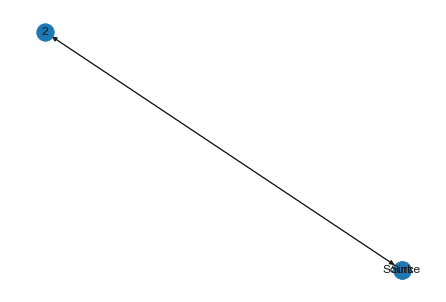

In [24]:

hubLocID = 2
locIDs = locationsPerHub(instance)[hubLocID]
requests = filterRequests(instance, day=1, locationsID=locIDs)
print(locIDs, requests)

G = createNxHub(instance, hubLocID, requests=requests)
pos = {id: (val['X'],val['Y']) for id,val in G.nodes(data=True)}
nx.draw(G, with_labels=True, pos = pos)
print(G.nodes())
print(G.edges())

In [17]:
def solveHubVRP(instance: InstanceCO22, hubLocID: int, requests: list) -> dict:
    #create networkX
    G = createNxHub(instance, hubLocID, requests)
    G_dict = {i:v for i,v in G.nodes(data=True)}
    #print(G_dict.keys())
    prob = VehicleRoutingProblem(G, load_capacity=instance.VanCapacity)
    prob.duration = instance.VanMaxDistance
    prob.fixed_cost = instance.VanDayCost
    prob.solve()
    best_routes = prob.best_routes
    #best_routes = {id:listReplace(best_routes[id], ["Source","Sink"], hubLocID) for id in best_routes.keys()}
    res =  {
        'routes': {key: {'route': [G_dict[id] for id in best_routes[key]]} for key in best_routes.keys()},
        'demand': sum([sum(req.amounts) for req in requests]),
        'amounts': amountPerProduct(instance, requests)
    }
    return res

In [18]:
%%capture
solveHubVRP(instance, 1, filterRequests(instance,day=1))

INFO:vrpy.vrp:new upper bound : max num stops = 4
INFO:vrpy.vrp:Clarke & Wright solution found with value 283 and 1 vehicles
INFO:vrpy.vrp:Greedy solution found with value 283 and 1 vehicles
INFO:vrpy.vrp:iteration 0, 283.0
INFO:vrpy.vrp:iteration 1, 283.0
INFO:vrpy.vrp:iteration 2, 283.0
INFO:vrpy.master_solve_pulp:total cost = 283.0


In [19]:
def createNxDepot(instance: InstanceCO22, dayRoutes: dict) -> nx.DiGraph:
    G = nx.DiGraph()
    #add hubs
    for hubLocID, hubData in dayRoutes.items():
        G.add_node(hubLocID, locID = hubLocID, demand = hubData['demand'], amounts= hubData['amounts'], X=instance.Locations[hubLocID].X, Y=instance.Locations[hubLocID].Y)

    G.add_node("Source", locID=1, X = instance.Locations[0].X, Y = instance.Locations[0].Y)
    G.add_node("Sink", locID=1, X = instance.Locations[0].X, Y = instance.Locations[0].Y)

    G = addAllEdges(G)
    return G

In [20]:
def solveDepotVRP(instance: InstanceCO22, dayRoutes: dict) -> dict:
    #for solving per day
    G = createNxDepot(instance, dayRoutes)
    G_dict = {i:v for i,v in G.nodes(data=True)}
    print(G_dict.keys())

    prob = VehicleRoutingProblem(G, load_capacity=instance.TruckCapacity)
    prob.duration = instance.TruckMaxDistance
    prob.fixed_cost = instance.TruckDayCost
    prob.solve()
    best_routes = prob.best_routes
    #best_routes = {id:listReplace(best_routes[id], ["Source","Sink"], hubLocID) for id in best_routes.keys()}
    res =  {key: [G_dict[id] for id in best_routes[key]] for key in best_routes.keys()}
    return res

In [63]:
def solve(instance: InstanceCO22) -> dict:
    nDays = instance.Days
    nHubs = len(instance.Hubs)
    hubLocIDs = list(range(2,nHubs+2))
    hubClusters = requestsPerHub(instance)
    hubRoutes = {}  
    for day in range(1, nDays+1):                                                   #hub routing
        dayRoutes = {}
        for hubLocID in hubLocIDs:
            hubCluster = hubClusters[hubLocID]
            #requestsToServe = filterRequests(instance, day, hubCluster)
            requestsToServe =[_ for _ in instance.Requests if _.ID in hubCluster and _.desiredDay is day]
            print(hubCluster, [_.ID for _ in requestsToServe])   #
            if(len(requestsToServe) > 0):
                dayHubRoutes = solveHubVRP(instance, hubLocID, requestsToServe)
                dayRoutes[hubLocID] = dayHubRoutes
        hubRoutes[day] = dayRoutes
    depotRoutes = {}
    for day in range(1, nDays+1):  
        if len(hubRoutes[day])>0:                                                #depot routing
            res = solveDepotVRP(instance, hubRoutes[day])
            depotRoutes[day] = res
        else:
            depotRoutes[day] = {}
    return {'hubRoutes': hubRoutes, 'depotRoutes': depotRoutes}

In [64]:
%%capture
res = solve(instance)

INFO:vrpy.vrp:new upper bound : max num stops = 3
INFO:vrpy.vrp:Clarke & Wright solution found with value 472 and 1 vehicles
INFO:vrpy.vrp:Greedy solution found with value 472 and 1 vehicles
INFO:vrpy.vrp:iteration 0, 472.0
INFO:vrpy.master_solve_pulp:total cost = 472.0
INFO:vrpy.vrp:new upper bound : max num stops = 3
INFO:vrpy.vrp:Clarke & Wright solution found with value 422 and 1 vehicles
INFO:vrpy.vrp:Greedy solution found with value 422 and 1 vehicles
INFO:vrpy.vrp:iteration 0, 422.0
INFO:vrpy.master_solve_pulp:total cost = 422.0
INFO:vrpy.vrp:new upper bound : max num stops = 3
INFO:vrpy.vrp:Clarke & Wright solution found with value 444 and 1 vehicles
INFO:vrpy.vrp:Greedy solution found with value 444 and 1 vehicles
INFO:vrpy.vrp:iteration 0, 444.0
INFO:vrpy.master_solve_pulp:total cost = 444.0
INFO:vrpy.vrp:new upper bound : max num stops = 3
INFO:vrpy.vrp:Clarke & Wright solution found with value 508 and 1 vehicles
INFO:vrpy.vrp:Greedy solution found with value 508 and 1 vehic

In [65]:
print(pprint.pformat(res))

{'depotRoutes': {1: {1: [{'X': 87,
                          'Y': 92,
                          'collect': 0,
                          'demand': 0,
                          'frequency': 1,
                          'locID': 1,
                          'lower': 0,
                          'service_time': 0,
                          'upper': 0},
                         {'X': 73,
                          'Y': 72,
                          'amounts': [0, 4, 3],
                          'collect': 0,
                          'demand': 7,
                          'frequency': 1,
                          'locID': 8,
                          'lower': 0,
                          'service_time': 0,
                          'upper': 0},
                         {'X': 39,
                          'Y': 18,
                          'amounts': [8, 5, 0],
                          'collect': 0,
                          'demand': 13,
                          'frequency': 1,
          

In [66]:
def solutionToStr(instance: InstanceCO22, res: dict):
    resultString = "DATASET = CO2022_11 \n \n"

    for day in range(1, instance.Days+1):
        resultString += f"DAY = {day} \n"
        nTrucks = len(res['depotRoutes'][day])
        resultString += f"NUMBER_OF_TRUCKS = {nTrucks} \n"

        truckString = ""
        for routeID, truckRoute in res['depotRoutes'][day].items():
            truckString += f"{routeID} "
            for i, hubData in enumerate(truckRoute[1:-1]):
                amountPerProduct = hubData['amounts']
                truckString += f"H{hubData['locID'] - 1} {','.join([str(_) for _ in amountPerProduct])} "
            truckString += "\n"
        resultString += truckString

        nVans = 0
        i = 0
        vanString = ""
        for hubLocID in res['hubRoutes'][day].keys():
            for _, route in res['hubRoutes'][day][hubLocID]['routes'].items():
                i+=1
                reqIds = [_['reqID'] for _ in route['route'][1:-1] ]
                vanString += f"{i} H{hubLocID-1} {' '.join([str(_) for _ in reqIds])} \n"
            nVans += len(res['hubRoutes'][day][hubLocID]['routes'])
        resultString += f"NUMBER_OF_VANS = {nVans} \n"  
        resultString += vanString + "\n"
    return resultString
    

In [67]:
solutionStr = solutionToStr(instance,res)
with open("./solution_test_alg1.txt" ,'w') as file:
    file.write(solutionStr)


In [ ]:
#assign hub to locations
#for each day, for each hub:
    #get request for hub, day
    #turn into networkX graph
    #solve using vrpy
    #store results
